In [50]:
import pandas as pd
from scipy.fft import fft, fftfreq
import scipy
import scipy.fftpack
import numpy as np
import matplotlib.pyplot as plt

In [96]:

vibration_data = pd.read_csv("../DatasetEnsaios/Ensaio_2023-12-19_1/SW10P/3750RPM.csv", sep=',') #importando o arquivo
dt  = 3.906250E-5 #tempo entre amostras
N  = len(vibration_data['tempo']) #numero de amostras 
tempo = vibration_data['tempo']
vibracao = vibration_data['vibracao']
tensao = vibration_data['tensao']
yf = scipy.fft.fft(vibracao.values)
xf = fftfreq(N, dt)[:N//2]


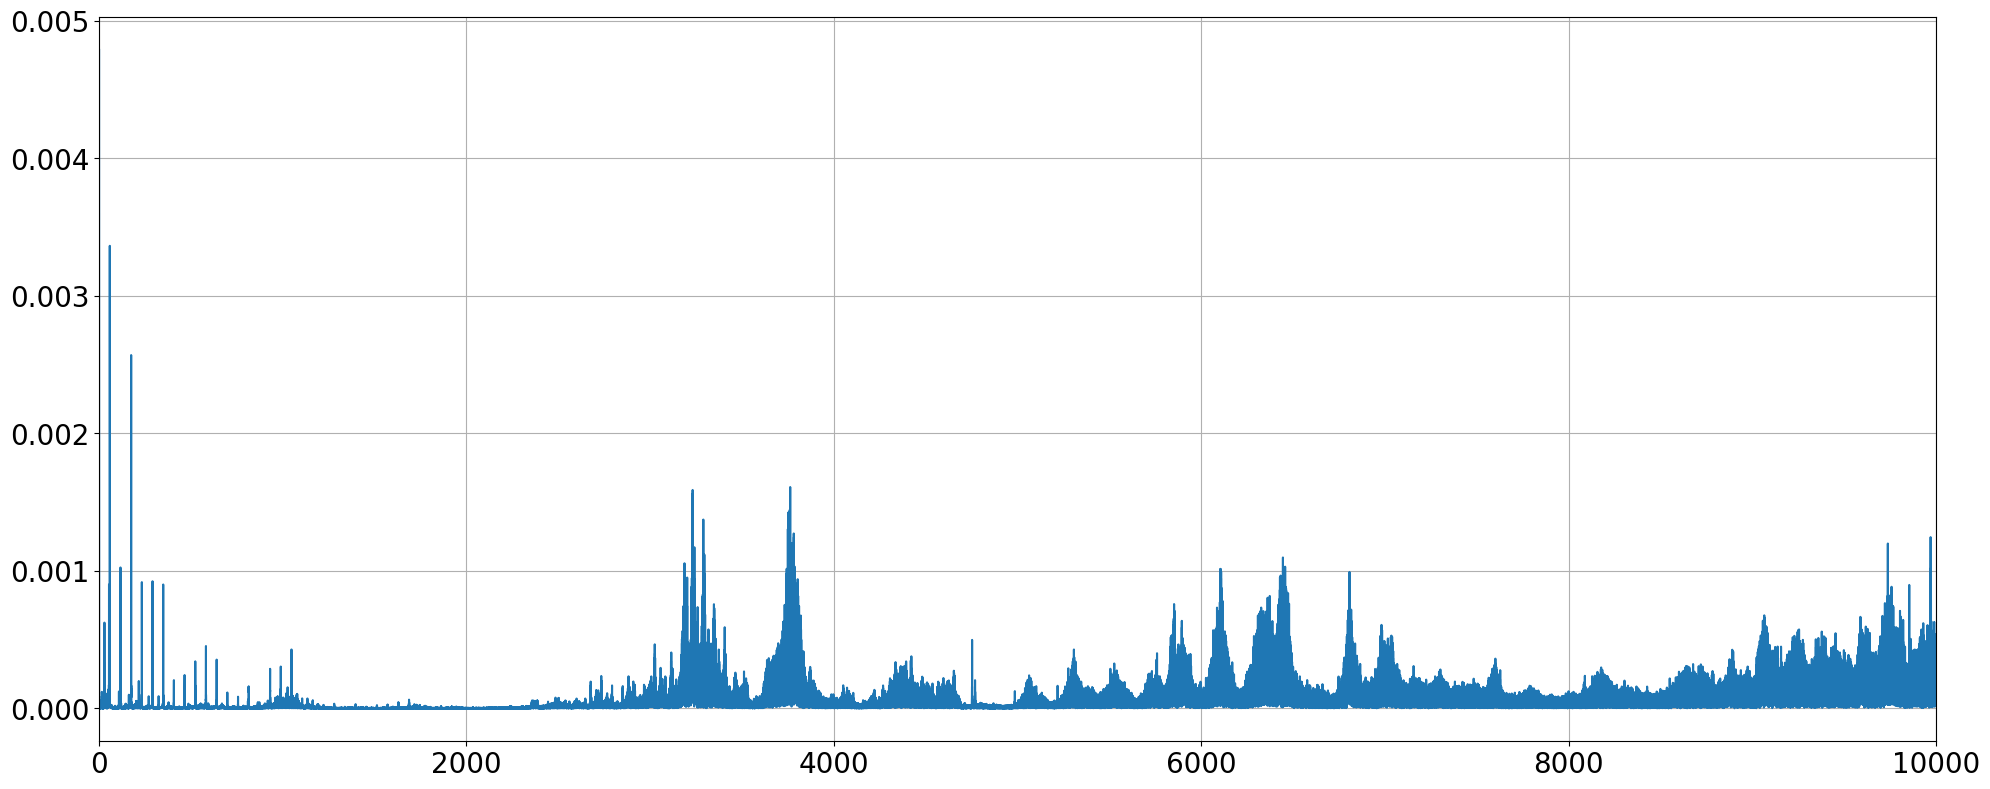

In [97]:
plt.figure(figsize=(20, 8))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))


# Definindo limites dos eixos

plt.xlim(0, 10000)  # Limites para o eixo x
#plt.ylim(-1, 1)  # Limites para o eixo y


#Configurando os ticks nos eixos

#plt.xticks(range(0,141, 5), rotation=45) 
#plt.yticks(range(0,10000, 5000), rotation=45) 
plt.tick_params(axis='both', which='major', labelsize=20)



plt.grid()
plt.tight_layout()
plt.show()

In [98]:
# Obtendo as n frequências de maior amplitude
amplitudes = 2.0 / N * np.abs(yf[0:N//2])

n = 5

# Encontra as três maiores amplitudes e seus índices
maiores_amplitudes_indices = np.argsort(-amplitudes)[:n]
maiores_amplitudes = amplitudes[maiores_amplitudes_indices]

# Encontra as frequências correspondentes às três maiores amplitudes
frequencias = xf[maiores_amplitudes_indices]

# Saída das três maiores amplitudes e suas frequências correspondentes
for i in range(n):
    print("Maior Amplitude", i+1, ":", maiores_amplitudes[i])
    print("Frequência", i+1, ":", frequencias[i], "Hz")

Maior Amplitude 1 : 0.004785899007323021
Frequência 1 : 0.0 Hz
Maior Amplitude 2 : 0.0033622346881526047
Frequência 2 : 58.166666666666664 Hz
Maior Amplitude 3 : 0.002567992586463412
Frequência 3 : 174.53333333333333 Hz
Maior Amplitude 4 : 0.0019696865694833346
Frequência 4 : 10083.866666666667 Hz
Maior Amplitude 5 : 0.001951250043008559
Frequência 5 : 58.199999999999996 Hz


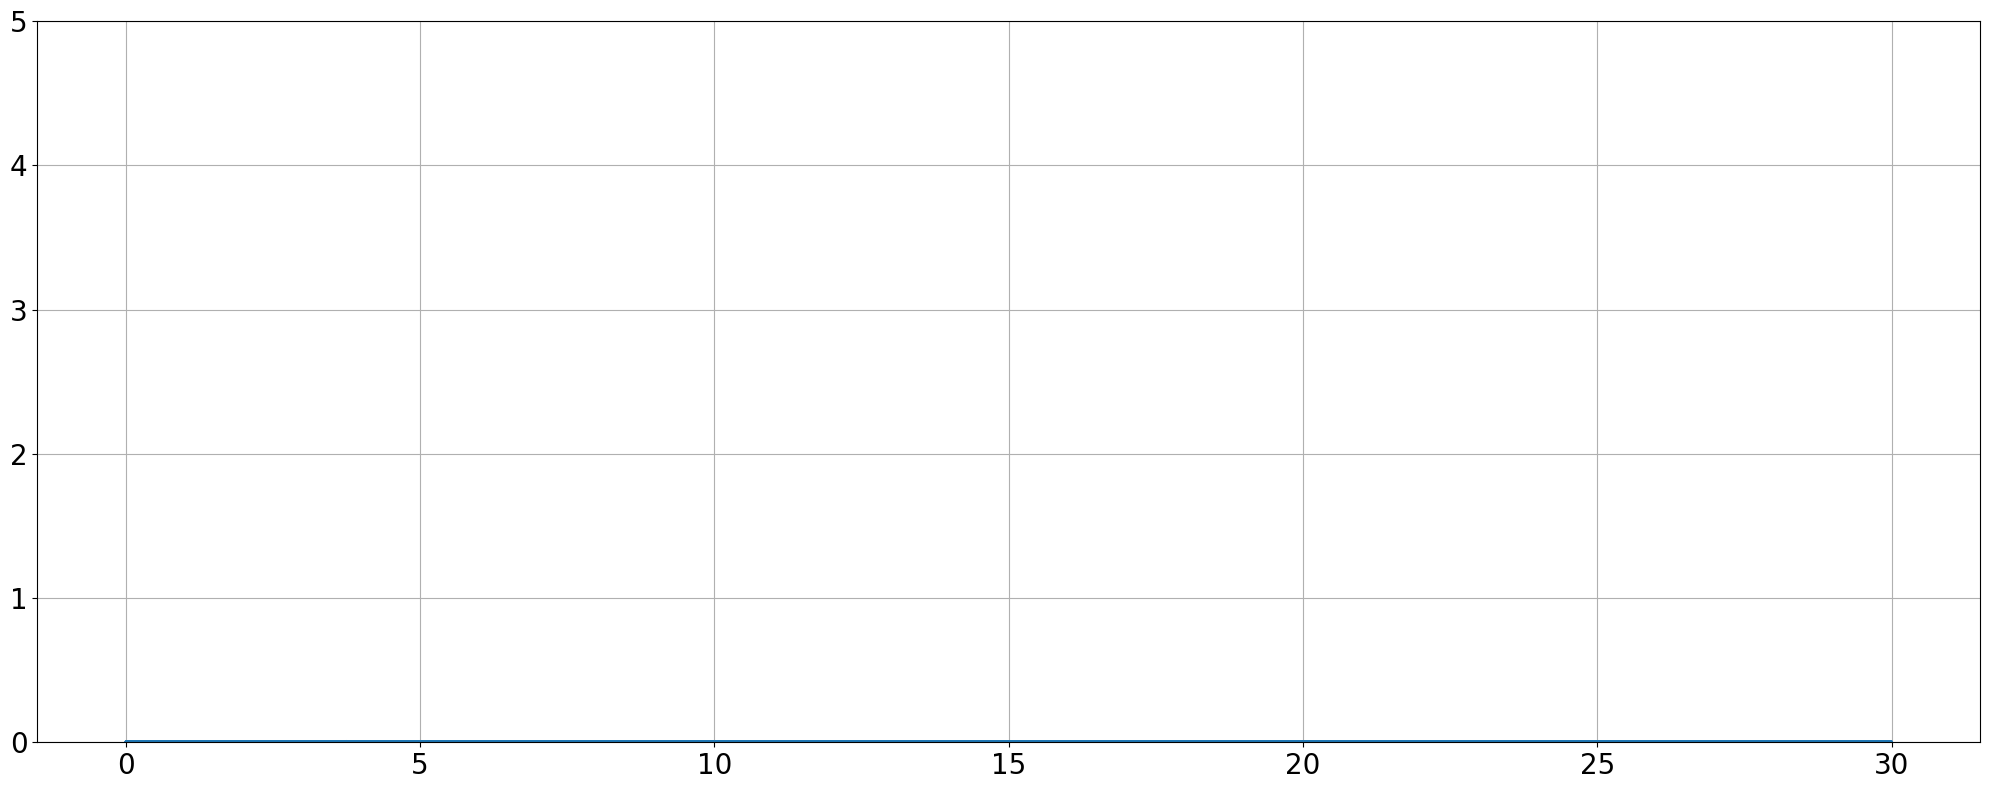

In [99]:
plt.figure(figsize=(20, 8))
plt.plot(tempo, tensao)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(0, 5)  # Limites para o eixo y


plt.grid()
plt.tight_layout()
plt.show()
